In [1]:
import pandas as pd
import matplotlib as plt
df=pd.read_csv("Datasets/PH_DATA.csv",index_col = 0)

In [2]:
df.head()

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange,Cluster
0,NVS,Novartis AG,96.65,0.19,21.6,17.9,11.2,0.5,0.06,-2.69,22.4,Hold,SWITZERLAND,NYSE,2
1,BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE,5
2,CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ,4
3,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE,3
4,IVX,IVAX Corporation,2.60,0.65,19.9,21.4,6.8,0.6,1.45,13.99,11.0,Hold,US,AMEX,3


In [3]:
# split data table into data X and class labels Y

X = df.iloc[:,2:11].values
Y = df.iloc[:,14].values

In [4]:
## STANDARDIZE DATA
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [6]:
import numpy as np

In [ ]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

In [7]:
### Using Corelation Matrix
cor_mat = np.corrcoef(X_std.T)
cor_mat

array([[ 1.        , -0.31250762, -0.08798317,  0.61952576,  0.80908852,
         0.50791751, -0.40893748,  0.00378898,  0.51671108],
       [-0.31250762,  1.        , -0.19716312, -0.20273345, -0.42583638,
        -0.32069694,  0.40116206,  0.08807135, -0.34546582],
       [-0.08798317, -0.19716312,  1.        , -0.32205434, -0.2920779 ,
         0.14974635, -0.0398577 , -0.15499183, -0.46240116],
       [ 0.61952576, -0.20273345, -0.32205434,  1.        ,  0.831686  ,
         0.49612507,  0.01560562, -0.01905389,  0.6339583 ],
       [ 0.80908852, -0.42583638, -0.2920779 ,  0.831686  ,  1.        ,
         0.61977107, -0.36535802, -0.02118403,  0.74875756],
       [ 0.50791751, -0.32069694,  0.14974635,  0.49612507,  0.61977107,
         1.        , -0.30817546, -0.25302457,  0.01862763],
       [-0.40893748,  0.40116206, -0.0398577 ,  0.01560562, -0.36535802,
        -0.30817546,  1.        , -0.021881  , -0.22135214],
       [ 0.00378898,  0.08807135, -0.15499183, -0.01905389, -0

In [8]:
##Extracting Eigen Values and Eigen Vectors from Corelation Matrix
eig_vals, eig_vecs = np.linalg.eig(cor_mat)

In [9]:
eig_vals
## represent the variance captured for each PC

array([3.80802961, 1.70283493, 1.14358071, 0.81573843, 0.70712345,
       0.45389788, 0.23374077, 0.0195977 , 0.11545652])

standardised data - mean = 0 std = 1 variance = 1
market capital = 1 beta = 1 pe r= 1
overall combined variance = 9

In [11]:
sum(eig_vals)

9.000000000000005

In [12]:
#### Calculating %age Variance Explained by each Component
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
var_exp

[42.311440132872264,
 18.920388074879956,
 12.706452320268447,
 9.063760383419721,
 7.856927249698165,
 5.0433098123343765,
 2.597119666674994,
 1.2828501719107288,
 0.21775218794133772]

In [13]:
#### Calculating cumulative %age Variance Explained 
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 42.31144013,  61.23182821,  73.93828053,  83.00204091,
        90.85896816,  95.90227797,  98.49939764,  99.78224781,
       100.        ])

In [14]:
Component = pd.DataFrame({"Components":[y for y in range(1,10)],
                      "Eig Values": [x for x in eig_vals],
                      "Var expl": [a for a in var_exp],
                      "Cum var":[b for b in cum_var_exp]},columns = ['Components','Eig Values','Var expl','Cum var'])
Component

,Components,Eig Values,Var expl,Cum var
0,1,3.808030,42.311440,42.311440
1,2,1.702835,18.920388,61.231828
2,3,1.143581,12.706452,73.938281
3,4,0.815738,9.063760,83.002041
4,5,0.707123,7.856927,90.858968
5,6,0.453898,5.043310,95.902278
6,7,0.233741,2.597120,98.499398
7,8,0.019598,1.282850,99.782248
8,9,0.115457,0.217752,100.000000


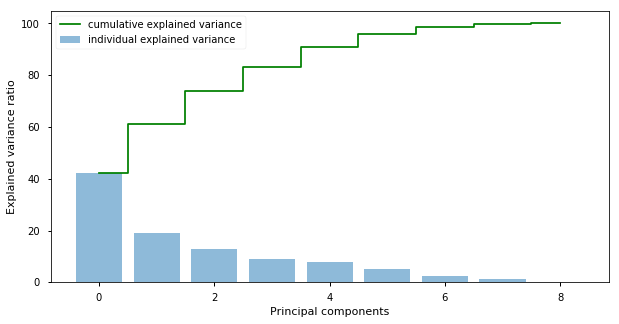

In [12]:
### Scree Plot
from matplotlib import pyplot as plt
%matplotlib inline
with plt.style.context('seaborn-notebook'):
    plt.figure(figsize=(10,5))

    plt.bar(range(9), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(9), cum_var_exp,where = "mid",
             label='cumulative explained variance',c ="g")
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')

In [15]:
Factor_Loading = pd.DataFrame({"Variables":[x for x in df.columns[2:11]],
                       "PC 1":[y for y in eig_vecs[0]],
                      "PC 2":[y for y in eig_vecs[1]],
                      "PC 3":[y for y in eig_vecs[2]],
                      "PC 4":[y for y in eig_vecs[3]],
                    "PC 5":[y for y in eig_vecs[4]]},
                     columns = ['Variables','PC 1','PC 2','PC 3','PC 4','PC 5'])
Factor_Loading

,Variables,PC 1,PC 2,PC 3,PC 4,PC 5
0,Market_Cap,0.431325,-0.261023,-0.137483,0.419837,0.503593
1,Beta,-0.063225,0.341518,-0.597453,0.196650,0.045260
2,PE_Ratio,-0.019910,0.342783,-0.026662,0.339803,0.058542
3,ROE,0.241311,0.389633,0.212883,0.136908,0.050919
4,ROA,0.102279,0.509115,-0.448582,-0.225699,-0.004622
5,Asset_Turnover,-0.535867,-0.401623,-0.489535,0.040777,0.008171
6,Leverage,-0.648347,0.328465,0.364666,0.299164,0.102026
7,Rev_Growth,-0.178526,0.012635,0.048806,-0.093238,0.802750
8,Net_Profit_Margin,-0.038644,0.131794,0.043417,-0.707150,0.288826


In [16]:
#Using built in function from sklearn library
from sklearn.decomposition import PCA 
pca = PCA(n_components=5)
factors = pca.fit_transform(X_std)
var_exp = pca.fit(X_std.T).explained_variance_ratio_

In [18]:
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
for K in range(4):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value)#, weights='uniform', algorithm='auto')
    neigh.fit(factors, Y) 
    y_pred = neigh.predict(factors)
    print ("Accuracy is ", accuracy_score(Y,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  100.0 % for K-Value: 1
Accuracy is  90.47619047619048 % for K-Value: 2
Accuracy is  100.0 % for K-Value: 3
Accuracy is  90.47619047619048 % for K-Value: 4


In [22]:
import sklearn.pipeline as skpl
import sklearn.linear_model as sklm
pca = sklearnPCA(n_components=4)
log_reg = sklm.LogisticRegression()

In [23]:
pipeline = skpl.Pipeline([('pca',pca),('logistic_regression',log_reg)])
fit = pipeline.fit(X,Y)

In [24]:
pred = pipeline.predict(X)

In [25]:
pd.crosstab(pred,Y)

col_0,0,1,2,3,4,5
row_0,,,,,,
1,0,8,2,0,0,0
2,0,0,1,0,0,0
3,0,0,0,4,0,0
4,2,0,0,0,2,0
5,0,0,0,0,0,2


In [26]:
pred

array([1, 2, 1, 4, 1, 3, 1, 3, 1, 1, 1, 5, 5, 4, 3, 1, 1, 1, 4, 4, 3])